In [1]:
library(MASS)

In [17]:
gaussprocess <- function(from = 0, to = 1, h=0.1,
                         start = 0, m = 1000) {
  # Simulates a Gaussian process with a given kernel
  #
  # args:
  #   from: numeric for the starting location of the sequence
  #   to: numeric for the ending location of the sequence
  #   K: a function that corresponds to the kernel (covariance function) of
  #      the process; must give numeric outputs, and if this won't produce a
  #      positive semi-definite matrix, it could fail; default is a Wiener
  #      process
  #   start: numeric for the starting position of the process
  #   m: positive integer for the number of points in the process to simulate
  #
  # return:
  #   A data.frame with variables "t" for the time index and "xt" for the value
  #   of the process
    
  K = function(s, t) {exp(-(s-t)^2/(2*h^2))}
   
  t <- seq(from = from, to = to, length.out = m)
  Sigma <- sapply(t, function(s1) {
    sapply(t, function(s2) {
      K(s1, s2)
    })
  })
   
  path <- mvrnorm(mu = rep(0, times = m), Sigma = Sigma)
  path <- path - path[1] + start  # Must always start at "start"
   
  return(data.frame("t" = t, "xt" = path))
}

In [24]:
1.33890430693733 - 1.3381895147172

[1] 0.0007147922

In [21]:
path

[1] 1.338190 1.338904 1.339621 1.340339 1.341059 1.341780 1.342503 1.343228
   [9] 1.343954 1.344683 1.345413 1.346144 1.346877 1.347612 1.348349 1.349087
  [17] 1.349827 1.350569 1.351312 1.352057 1.352803 1.353551 1.354302 1.355054
  [25] 1.355806 1.356561 1.357318 1.358077 1.358837 1.359598 1.360361 1.361127
  [33] 1.361893 1.362661 1.363431 1.364203 1.364976 1.365751 1.366527 1.367306
  [41] 1.368085 1.368867 1.369650 1.370435 1.371221 1.372009 1.372798 1.373590
  [49] 1.374383 1.375177 1.375973 1.376771 1.377570 1.378371 1.379174 1.379978
  [57] 1.380784 1.381591 1.382401 1.383211 1.384024 1.384838 1.385653 1.386470
  [65] 1.387289 1.388109 1.388931 1.389755 1.390580 1.391406 1.392235 1.393065
  [73] 1.393896 1.394729 1.395564 1.396400 1.397238 1.398077 1.398918 1.399761
  [81] 1.400604 1.401450 1.402297 1.403146 1.403996 1.404848 1.405702 1.406557
  [89] 1.407413 1.408271 1.409131 1.409992 1.410855 1.411719 1.412585 1.413452
  [97] 1.414321 1.415191 1.416063 1.416937 1.417811 1.418688 1.419566 1.420445
 [105] 1.421326 1.422209 1.423093 1.423978 1.424865 1.425754 1.426644 1.427535
 [113] 1.428428 1.429323 1.430219 1.431116 1.432015 1.432915 1.433817 1.434721
 [121] 1.435625 1.436532 1.437439 1.438349 1.439259 1.440171 1.441085 1.442000
 [129] 1.442916 1.443834 1.444753 1.445674 1.446596 1.447520 1.448445 1.449372
 [137] 1.450299 1.451229 1.452159 1.453092 1.454025 1.454960 1.455896 1.456834
 [145] 1.457773 1.458714 1.459656 1.460599 1.461544 1.462490 1.463437 1.464386
 [153] 1.465336 1.466288 1.467241 1.468195 1.469151 1.470108 1.471066 1.472026
 [161] 1.472987 1.473949 1.474913 1.475878 1.476844 1.477812 1.478781 1.479752
 [169] 1.480723 1.481696 1.482671 1.483646 1.484623 1.485601 1.486581 1.487562
 [177] 1.488544 1.489527 1.490512 1.491498 1.492485 1.493473 1.494463 1.495454
 [185] 1.496446 1.497440 1.498435 1.499431 1.500428 1.501426 1.502426 1.503427
 [193] 1.504429 1.505433 1.506437 1.507443 1.508450 1.509459 1.510468 1.511479
 [201] 1.512491 1.513504 1.514518 1.515534 1.516550 1.517568 1.518587 1.519607
 [209] 1.520629 1.521651 1.522675 1.523700 1.524726 1.525753 1.526781 1.527810
 [217] 1.528841 1.529873 1.530905 1.531939 1.532974 1.534010 1.535048 1.536086
 [225] 1.537125 1.538166 1.539208 1.540250 1.541294 1.542339 1.543385 1.544432
 [233] 1.545480 1.546529 1.547580 1.548631 1.549683 1.550737 1.551791 1.552847
 [241] 1.553903 1.554960 1.556019 1.557079 1.558139 1.559200 1.560263 1.561327
 [249] 1.562392 1.563457 1.564523 1.565591 1.566660 1.567729 1.568800 1.569871
 [257] 1.570943 1.572017 1.573091 1.574166 1.575242 1.576320 1.577398 1.578477
 [265] 1.579557 1.580637 1.581719 1.582802 1.583885 1.584970 1.586055 1.587141
 [273] 1.588228 1.589316 1.590405 1.591495 1.592585 1.593677 1.594769 1.595863
 [281] 1.596956 1.598051 1.599147 1.600244 1.601341 1.602439 1.603538 1.604638
 [289] 1.605738 1.606840 1.607942 1.609045 1.610149 1.611254 1.612359 1.613465
 [297] 1.614572 1.615680 1.616788 1.617897 1.619007 1.620118 1.621229 1.622341
 [305] 1.623454 1.624568 1.625682 1.626797 1.627913 1.629029 1.630146 1.631264
 [313] 1.632383 1.633502 1.634622 1.635742 1.636863 1.637985 1.639107 1.640231
 [321] 1.641354 1.642479 1.643604 1.644730 1.645856 1.646983 1.648110 1.649239
 [329] 1.650367 1.651497 1.652627 1.653757 1.654888 1.656020 1.657152 1.658285
 [337] 1.659418 1.660552 1.661687 1.662822 1.663957 1.665094 1.666230 1.667367
 [345] 1.668505 1.669643 1.670782 1.671921 1.673061 1.674201 1.675342 1.676483
 [353] 1.677624 1.678766 1.679909 1.681052 1.682195 1.683339 1.684483 1.685628
 [361] 1.686774 1.687919 1.689065 1.690211 1.691358 1.692506 1.693653 1.694801
 [369] 1.695950 1.697098 1.698247 1.699397 1.700547 1.701697 1.702848 1.703999
 [377] 1.705150 1.706302 1.707454 1.708606 1.709758 1.710911 1.712064 1.713218
 [385] 1.714372 1.715526 1.716680 1.717835 1.718990 1.720145 1.721300 1.722456
 [393] 1.723612 1.724768 1.725924 1.727081 1.728238 1.729395 1.730552 1.731709
 [401] 1.732867 1.734025 1.735183 1.736341 1.737500 1

In [22]:
path <- path - path[1] + 0

In [23]:
path

[1] 0.0000000000 0.0007147922 0.0014317057 0.0021496958 0.0028690845
   [6] 0.0035907380 0.0043136067 0.0050384153 0.0057648857 0.0064934078
  [11] 0.0072230694 0.0079546335 0.0086878061 0.0094219933 0.0101598135
  [16] 0.0108973209 0.0116375850 0.0123791093 0.0131226175 0.0138677297
  [21] 0.0146138369 0.0153619172 0.0161126325 0.0168640771 0.0176166979
  [26] 0.0183718485 0.0191288345 0.0198874843 0.0206471362 0.0214087676
  [31] 0.0221719474 0.0229370346 0.0237034600 0.0244717404 0.0252416137
  [36] 0.0260133276 0.0267864567 0.0275613458 0.0283379188 0.0291161337
  [41] 0.0298956936 0.0306771375 0.0314602883 0.0322450878 0.0330314228
  [46] 0.0338192305 0.0346089833 0.0354001714 0.0361930266 0.0369875373
  [51] 0.0377837360 0.0385814362 0.0393809001 0.0401818416 0.0409843240
  [56] 0.0417887004 0.0425945549 0.0434019652 0.0442112256 0.0450217785
  [61] 0.0458341400 0.0466480469 0.0474635076 0.0482807157 0.0490993964
  [66] 0.0499197628 0.0507416853 0.0515651077 0.0523903503 0.0532169287
  [71] 0.0540450476 0.0548752197 0.0557065342 0.0565395924 0.0573742102
  [76] 0.0582103222 0.0590483530 0.0598874989 0.0607283529 0.0615710673
  [81] 0.0624149433 0.0632607947 0.0641078945 0.0649566763 0.0658068366
  [86] 0.0666587232 0.0675122359 0.0683671684 0.0692236744 0.0700817294
  [91] 0.0709412850 0.0718025090 0.0726651957 0.0735294751 0.0743952379
  [96] 0.0752624197 0.0761312344 0.0770017754 0.0778735087 0.0787470444
 [101] 0.0796219034 0.0804984123 0.0813762876 0.0822558682 0.0831368265
 [106] 0.0840193885 0.0849033575 0.0857887569 0.0866757853 0.0875642289
 [111] 0.0884543248 0.0893457314 0.0902387432 0.0911331569 0.0920292676
 [116] 0.0929266542 0.0938255620 0.0947258558 0.0956277269 0.0965310994
 [121] 0.0974359819 0.0983422210 0.0992499767 0.1001590057 0.1010696230
 [126] 0.1019818425 0.1028953551 0.1038104181 0.1047267514 0.1056446817
 [131] 0.1065638933 0.1074847329 0.1084069703 0.1093304408 0.1102554963
 [136] 0.1111820084 0.1121098970 0.1130392309 0.1139699275 0.1149020536
 [141] 0.1158356088 0.1167705858 0.1177069542 0.1186445886 0.1195837333
 [146] 0.1205243260 0.1214663862 0.1224095161 0.1233541577 0.1243004721
 [151] 0.1252478025 0.1261966142 0.1271469022 0.1280984506 0.1290513837
 [156] 0.1300056591 0.1309612538 0.1319183605 0.1328766716 0.1338364820
 [161] 0.1347975217 0.1357599132 0.1367236152 0.1376885800 0.1386549721
 [166] 0.1396227960 0.1405918404 0.1415621726 0.1425338376 0.1435069216
 [171] 0.1444812138 0.1454566750 0.1464335677 0.1474118747 0.1483913329
 [176] 0.1493721794 0.1503543144 0.1513374883 0.1523222591 0.1533080793
 [181] 0.1542953481 0.1552838725 0.1562735705 0.1572646155 0.1582568274
 [186] 0.1592504386 0.1602450997 0.1612411994 0.1622383873 0.1632369248
 [191] 0.1642366599 0.1652377366 0.1662397594 0.1672432981 0.1682479228
 [196] 0.1692537526 0.1702609219 0.1712692613 0.1722785922 0.1732893527
 [201] 0.1743012451 0.1753142887 0.1763285701 0.1773440556 0.1783608028
 [206] 0.1793786276 0.1803976099 0.1814177096 0.1824391569 0.1834614585
 [211] 0.1844853589 0.1855100404 0.1865362747 0.1875631189 0.1885914272
 [216] 0.1896207070 0.1906513388 0.1916830686 0.1927157872 0.1937497719
 [221] 0.1947847841 0.1958208305 0.1968580841 0.1978964457 0.1989359110
 [226] 0.1999764171 0.2010181298 0.2020607819 0.2031046939 0.2041496020
 [231] 0.2051955612 0.2062426033 0.2072907384 0.2083398545 0.2093901961
 [236] 0.2104413688 0.2114937235 0.2125471216 0.2136014366 0.2146569877
 [241] 0.2157133818 0.2167709816 0.2178294542 0.2188890552 0.2199494946
 [246] 0.2210109709 0.2220737521 0.2231372059 0.2242020279 0.2252674566
 [251] 0.2263339800 0.2274016447 0.2284700763 0.2295396868 0.2306100355
 [256] 0.2316815227 0.2327538836 0.2338271044 0.2349015789 0.2359767519
 [261] 0.2370528896 0.2381299925 0.2392081583 0.2402870478 0.2413670305
 [266] 0.2424477154 0.2435295027 0.2446120816 0.2456956836 0.2467802079
 [271] 0.2478654973 0.2489517549 0.2500387989 0.2511267620 0.2522157065
 [276] 0.2533053833 0.2543959057 0.25548743

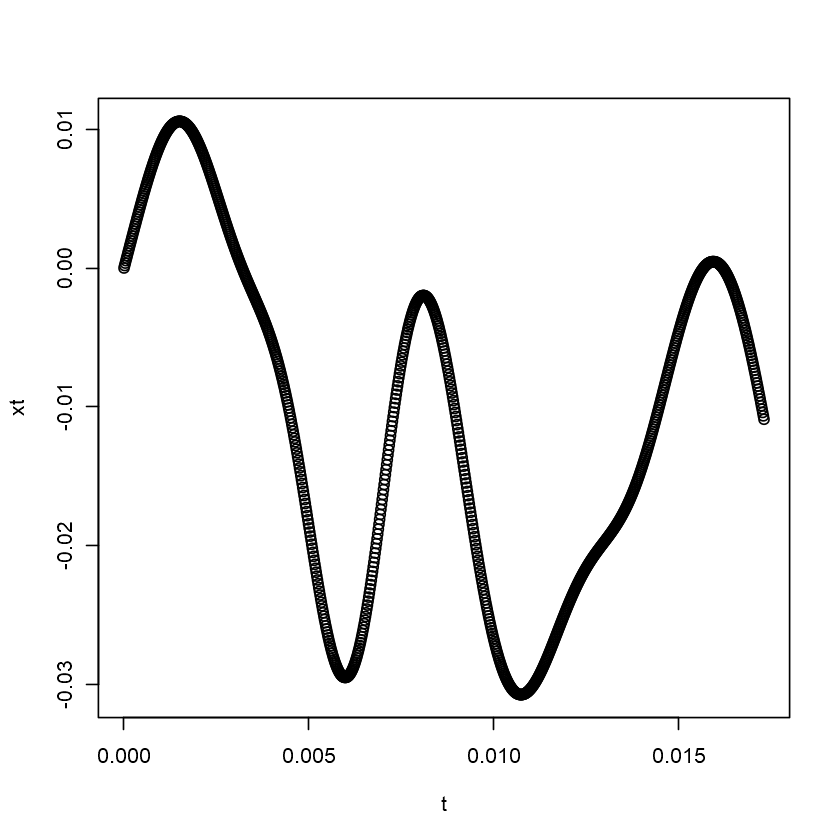

In [19]:
plot(0.0173*gaussprocess())